In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

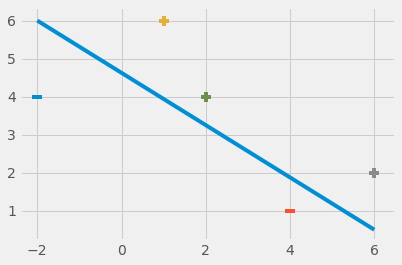

In [52]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1,6,-1],
    [2,4,-1],
    [6,2,-1],
])

# Associated output labels
# First 2 are labeled -1 and last 3 are 1
y = np.array([-1,-1,1,1,1])

# style.use('ggplot')
style.use('fivethirtyeight')

for d, sample in enumerate(X):
    # Plot the negative samples (first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_',linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+',linewidths=2)

# Print a possible hyperplane that seperates two lines
plt.plot([-2,6],[6,0.5])

In [3]:
def svm_gd(X,y,nb_epoch):
    
    w = np.zeros([3])
    eta = 1
    errors = []
    
    for epoch in range(1,nb_epoch):
        error = 0
        for i in range(len(X)):
            if (y[i] * np.dot(X[i],w)) < 1:
                w = w + eta * ((y[i] * X[i]) + (-2 * (1/epoch) * w))
                error = 1
#                 print("Inside If")
            else:
                w = w + eta * (-2 * (1/epoch) * w)
#                 print("Inside Else")
                
        errors.append(error)
    
    return errors, w
                

In [4]:
error, weight = svm_gd(X,y, 10000)

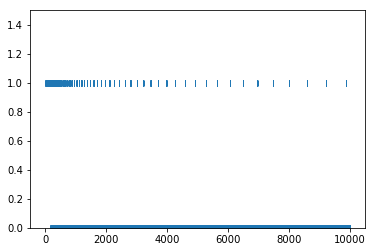

In [5]:
plt.plot(error,'|')
plt.ylim([0,1.5])
plt.show()

In [6]:
weight

array([  1.75528648,   3.4784601 ,  12.25751563])

In [7]:
# for d, sample in enumerate(X):
#     if d < 2:
#         plt.scatter(sample[0], sample[1], s=120, marker='_',linewidths=2)
#     else:
#         plt.scatter(sample[0], sample[1], s=120, marker='+',linewidths=2)
        
x2 = np.array([weight[0],weight[1],-weight[1],weight[0]])
x3 = np.array([weight[0],weight[1],weight[1],-weight[0]])

x2x3 = np.array([x2,x3])


In [8]:
x2

array([ 1.75528648,  3.4784601 , -3.4784601 ,  1.75528648])

In [9]:
x3

array([ 1.75528648,  3.4784601 ,  3.4784601 , -1.75528648])

In [10]:
x2x3

array([[ 1.75528648,  3.4784601 , -3.4784601 ,  1.75528648],
       [ 1.75528648,  3.4784601 ,  3.4784601 , -1.75528648]])

In [11]:
X,Y,U,V = zip(*x2x3)

In [12]:
X

(1.7552864799702415, 1.7552864799702415)

In [13]:
Y

(3.4784600983277034, 3.4784600983277034)

In [14]:
U

(-3.4784600983277034, 3.4784600983277034)

In [15]:
V

(1.7552864799702415, -1.7552864799702415)

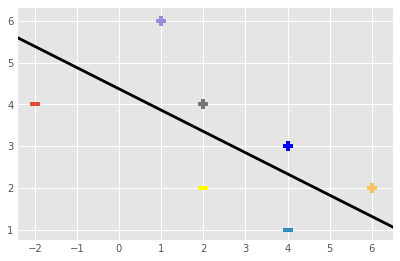

In [55]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_',linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+',linewidths=2)

plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

style.use('ggplot')

x,Y,U,V = zip(*x2x3)
axes = plt.gca()
axes.quiver(x,Y,U,V, scale=1)
plt.show()